# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

## Juan Diego Barnes, Francisco Legaspe, Rodrigo Martin

### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

Comenzamos cargando el conjunto de módulos/librerías que utilizaremos

In [3]:
import matplotlib.pyplot as plt # Para graficar
import requests # Para hacer pedidos a la web
from bs4 import BeautifulSoup # Para parsear el HTML
import pandas as pd # Para manipular los datos

#### Ejercicio 1
Nuestro objetivo es conectarnos a la API de Mercado Libre, para obtener los ítems de una consulta de búsqueda. Principalmente estamos interesados en obtener los precios, nuestra búsqueda de precios de pavas eléctricas de 1.7 litros, queriendo conocer la distribución de precios de estos

In [4]:
# URL de la página a scrapear
busqueda = "Pava Electrica 1.7L"

r = requests.get('https://listado.mercadolibre.com.ar/{}#D[A:{}]'.format(busqueda.replace(' ','-'),busqueda))

contenido = r.content
soup = BeautifulSoup(contenido, 'html.parser')

#### Ejercicio 2
Guardamos los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [5]:
alldivs = soup.find_all('div',{ 'class':'andes-card'})
#Array donde estarán los productos
productos_array = []
#Extraigo los datos de cada producto y los guardo
for item in alldivs:
    data={}
    data['Nombre']=item.find('h2',{'class':'ui-search-item__title'}).text
    precio_symbol = item.find('span', {'class': 'andes-money-amount__currency-symbol'}).text
    precio_fraction = item.find('span', {'class': 'andes-money-amount__fraction'}).text
    data['Precio'] = f'{precio_symbol}{precio_fraction}'
    
    productos_array.append(data)
    print(data)
    #Creamos el dataframe con los datos extraidos
    productos_df = pd.DataFrame(productos_array)
    

{'Nombre': 'Pava Electrica Philips Hd9368 Regulador Temp Y Corte P/mate', 'Precio': '$29.500'}
{'Nombre': 'Philco Pe0821npp Pava Electrica 1.7l Hervidora Negro', 'Precio': '$16.744'}
{'Nombre': 'Pava eléctrica Peabody PE-KV8215 roja 220V 1.7L', 'Precio': '$43.749'}
{'Nombre': 'Philco Pe1821npp Pava Eléctrica C/ Regulador De Temperatura', 'Precio': '$19.800'}
{'Nombre': 'Pava Eléctrica Sansei Pe1821bp Selector De Temperatura 1.7l', 'Precio': '$25.499'}
{'Nombre': 'Pava Electrica Atma Essential Pe0821ap Corte Automat Blanco Color Blanco', 'Precio': '$17.280'}
{'Nombre': 'Ultracomb PE-4911 - Bordó - 220V', 'Precio': '$51.999'}
{'Nombre': 'Atma Pe1821nap Pava Electrica Con Regulador Temp 1.7 Litros Color Negro', 'Precio': '$19.016'}
{'Nombre': 'Pava eléctrica Liliana AP975 Tempomate negra 220V - 240V 1.7L', 'Precio': '$19.999'}
{'Nombre': 'Pava eléctrica Smartlife SL-EK1714 blanca 220V 1.7L', 'Precio': '$18.799'}
{'Nombre': 'Pava eléctrica Smartlife SL-EK1714 negra 220V 1.7L', 'Precio': '$

De esta forma obtuvimos los precios, pero estos estan en formato de texto ahora vamos a definirlos como numéricos para poder operar con ellos:

In [6]:
# Eliminamos el signo $ de la columna precio
productos_df['Precio'] = productos_df['Precio'].str[1:]
# Los puntos que observamos son separadores de miles y python lo interpreta como separador decimal, por lo que los eliminamos
productos_df['Precio'] = productos_df['Precio'].str.replace('.','')
# Ahora onvertimos la columna precio a int
productos_df['Precio'] = productos_df['Precio'].astype(int)

productos_df


,Nombre,Precio
0,Pava Electrica Philips Hd9368 Regulador Temp Y...,29500
1,Philco Pe0821npp Pava Electrica 1.7l Hervidora...,16744
2,Pava eléctrica Peabody PE-KV8215 roja 220V 1.7L,43749
3,Philco Pe1821npp Pava Eléctrica C/ Regulador D...,19800
4,Pava Eléctrica Sansei Pe1821bp Selector De Tem...,25499
5,Pava Electrica Atma Essential Pe0821ap Corte A...,17280
6,Ultracomb PE-4911 - Bordó - 220V,51999
7,Atma Pe1821nap Pava Electrica Con Regulador Te...,19016
8,Pava eléctrica Liliana AP975 Tempomate negra 2...,19999
9,Pava eléctrica Smartlife SL-EK1714 blanca 220V...,18799


Calculamos el promedio, minimo y maximo de los precios recolectados:

In [7]:
# Calcular el precio promedio
precio_promedio = productos_df['Precio'].mean()

# Calcular el precio mínimo
precio_minimo = productos_df['Precio'].min()

# Calcular el precio máximo
precio_maximo = productos_df['Precio'].max()

print(f'Precio Promedio: {precio_promedio}')
print(f'Precio Mínimo: {precio_minimo}')
print(f'Precio Máximo: {precio_maximo}')





Precio Promedio: 28480.14
Precio Mínimo: 9299
Precio Máximo: 119999


Encontramos que el precio promedio de las pavas eléctricas de 1.7 litros en Mercado Libre es de 28480,14 pesos. Siendo el menor precio de 9299 y el máximo de 119999 pesos.

#### Ejercicio 3
Vamos a armar un histograma de los precios. Para intentar identificar <i>outliers<i> en los precios obtenidos:

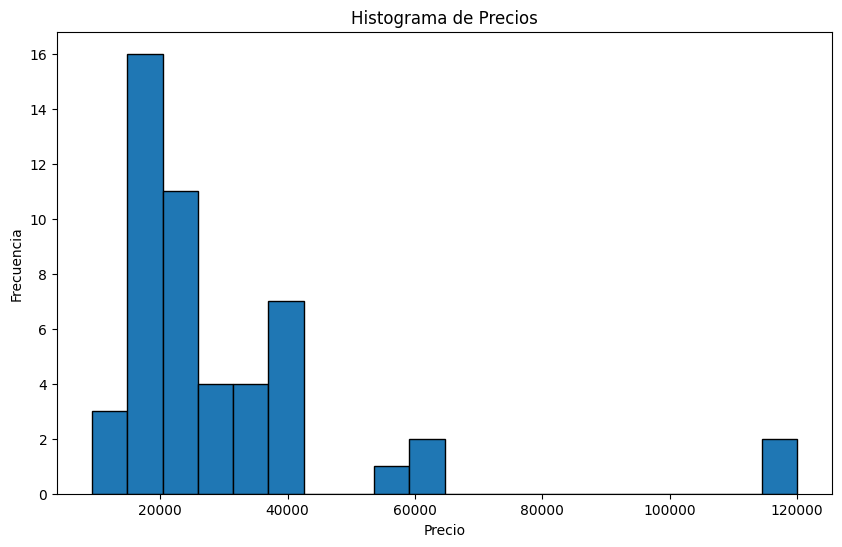

In [60]:
# Eliminar caracteres no numéricos y convertir la columna 'Precio' a tipo float
productos_df['Precio'] = productos_df['Precio'].astype(str).replace('[^\d.]', '', regex=True).astype(float)
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()


Podemos apreciar fácilmente que en el gráfico que el valor cercano a \$120,000 como un outlier.

Ahora intentemos identificar los valores atípicos con alguna medida más "objetiva", que el análisis visual:

In [8]:
# Detectar y mostrar valores atípicos (Outliers)
# Calcular el primer y tercer cuartil
Q1 = productos_df['Precio'].quantile(0.25)
Q3 = productos_df['Precio'].quantile(0.75)
# Calcular el rango intercuartil
IQR = Q3 - Q1
# Calcular los límites inferior y superior para detección de valores atípicos como 1.5 veces el rango intercuartil por debajo del primer cuartil y por encima del tercer cuartil, respectivamente
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = productos_df[(productos_df['Precio'] < lower_bound) | (productos_df['Precio'] > upper_bound)]
print('Valores atípicos:')
print(outliers)


Valores atípicos:
                                               Nombre  Precio
24  Pava Electrica Pe-4911 1,7lts Ultracomb 2200w ...   63699
28  Pava eléctrica Peabody PE-DK17411 Smartchef ac...  119999
39  Pava Eléctrica Peabody 1.7 Litros Termometro K...   55990


Se encontraron 3 observaciones que podríamos considerar valores atípicos bajo el criterio que adoptamos, de modo que eliminaremos estas de la muestra, para luego volver a graficar el histograma

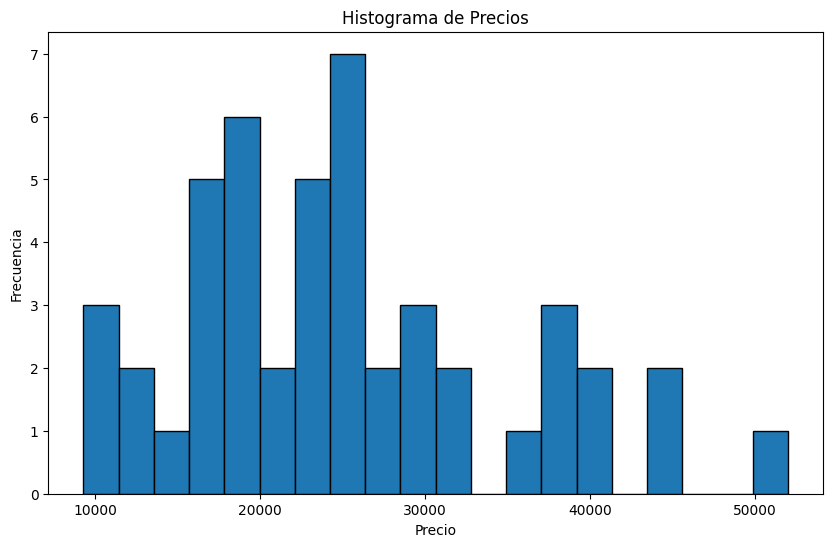

In [9]:

# Hacemos el droop de los valores atípicos
productos_df = productos_df.drop(outliers.index)

# Volvemos a graficar el histograma
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()
